# CMPT 2400 - PHASE 2

# Our Approach
To answer the question “How will landfill, treatment, and recycling change in the next 5 years?”, we followed a clear and easy

1) Clean the data first:
We removed missing values, duplicates, and unnecessary columns so that the data becomes accurate and ready for analysis.

2) Reduce highly correlated columns:
We created a correlation heatmap and dropped columns that were very similar to each other.
This avoids confusion and makes the dataset cleaner.

3) Identify the main categories:
From the dataset, we combined all relevant columns into 3 meaningful groups:
- Landfill
- Treatment
- Recycling


In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your cleaned dataset
disposals_encoded = pd.read_csv("cleaned_disposals.csv")

# 2. Confirm data loaded
print("Dataset loaded — shape:", disposals_encoded.shape)

# 3. Select numeric columns
numeric_df = disposals_encoded.select_dtypes(include=['number'])

numeric_df.shape


Dataset loaded — shape: (191645, 380)


/tmp/ipython-input-4049404072.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  disposals_encoded = pd.read_csv("cleaned_disposals.csv")


(191645, 33)

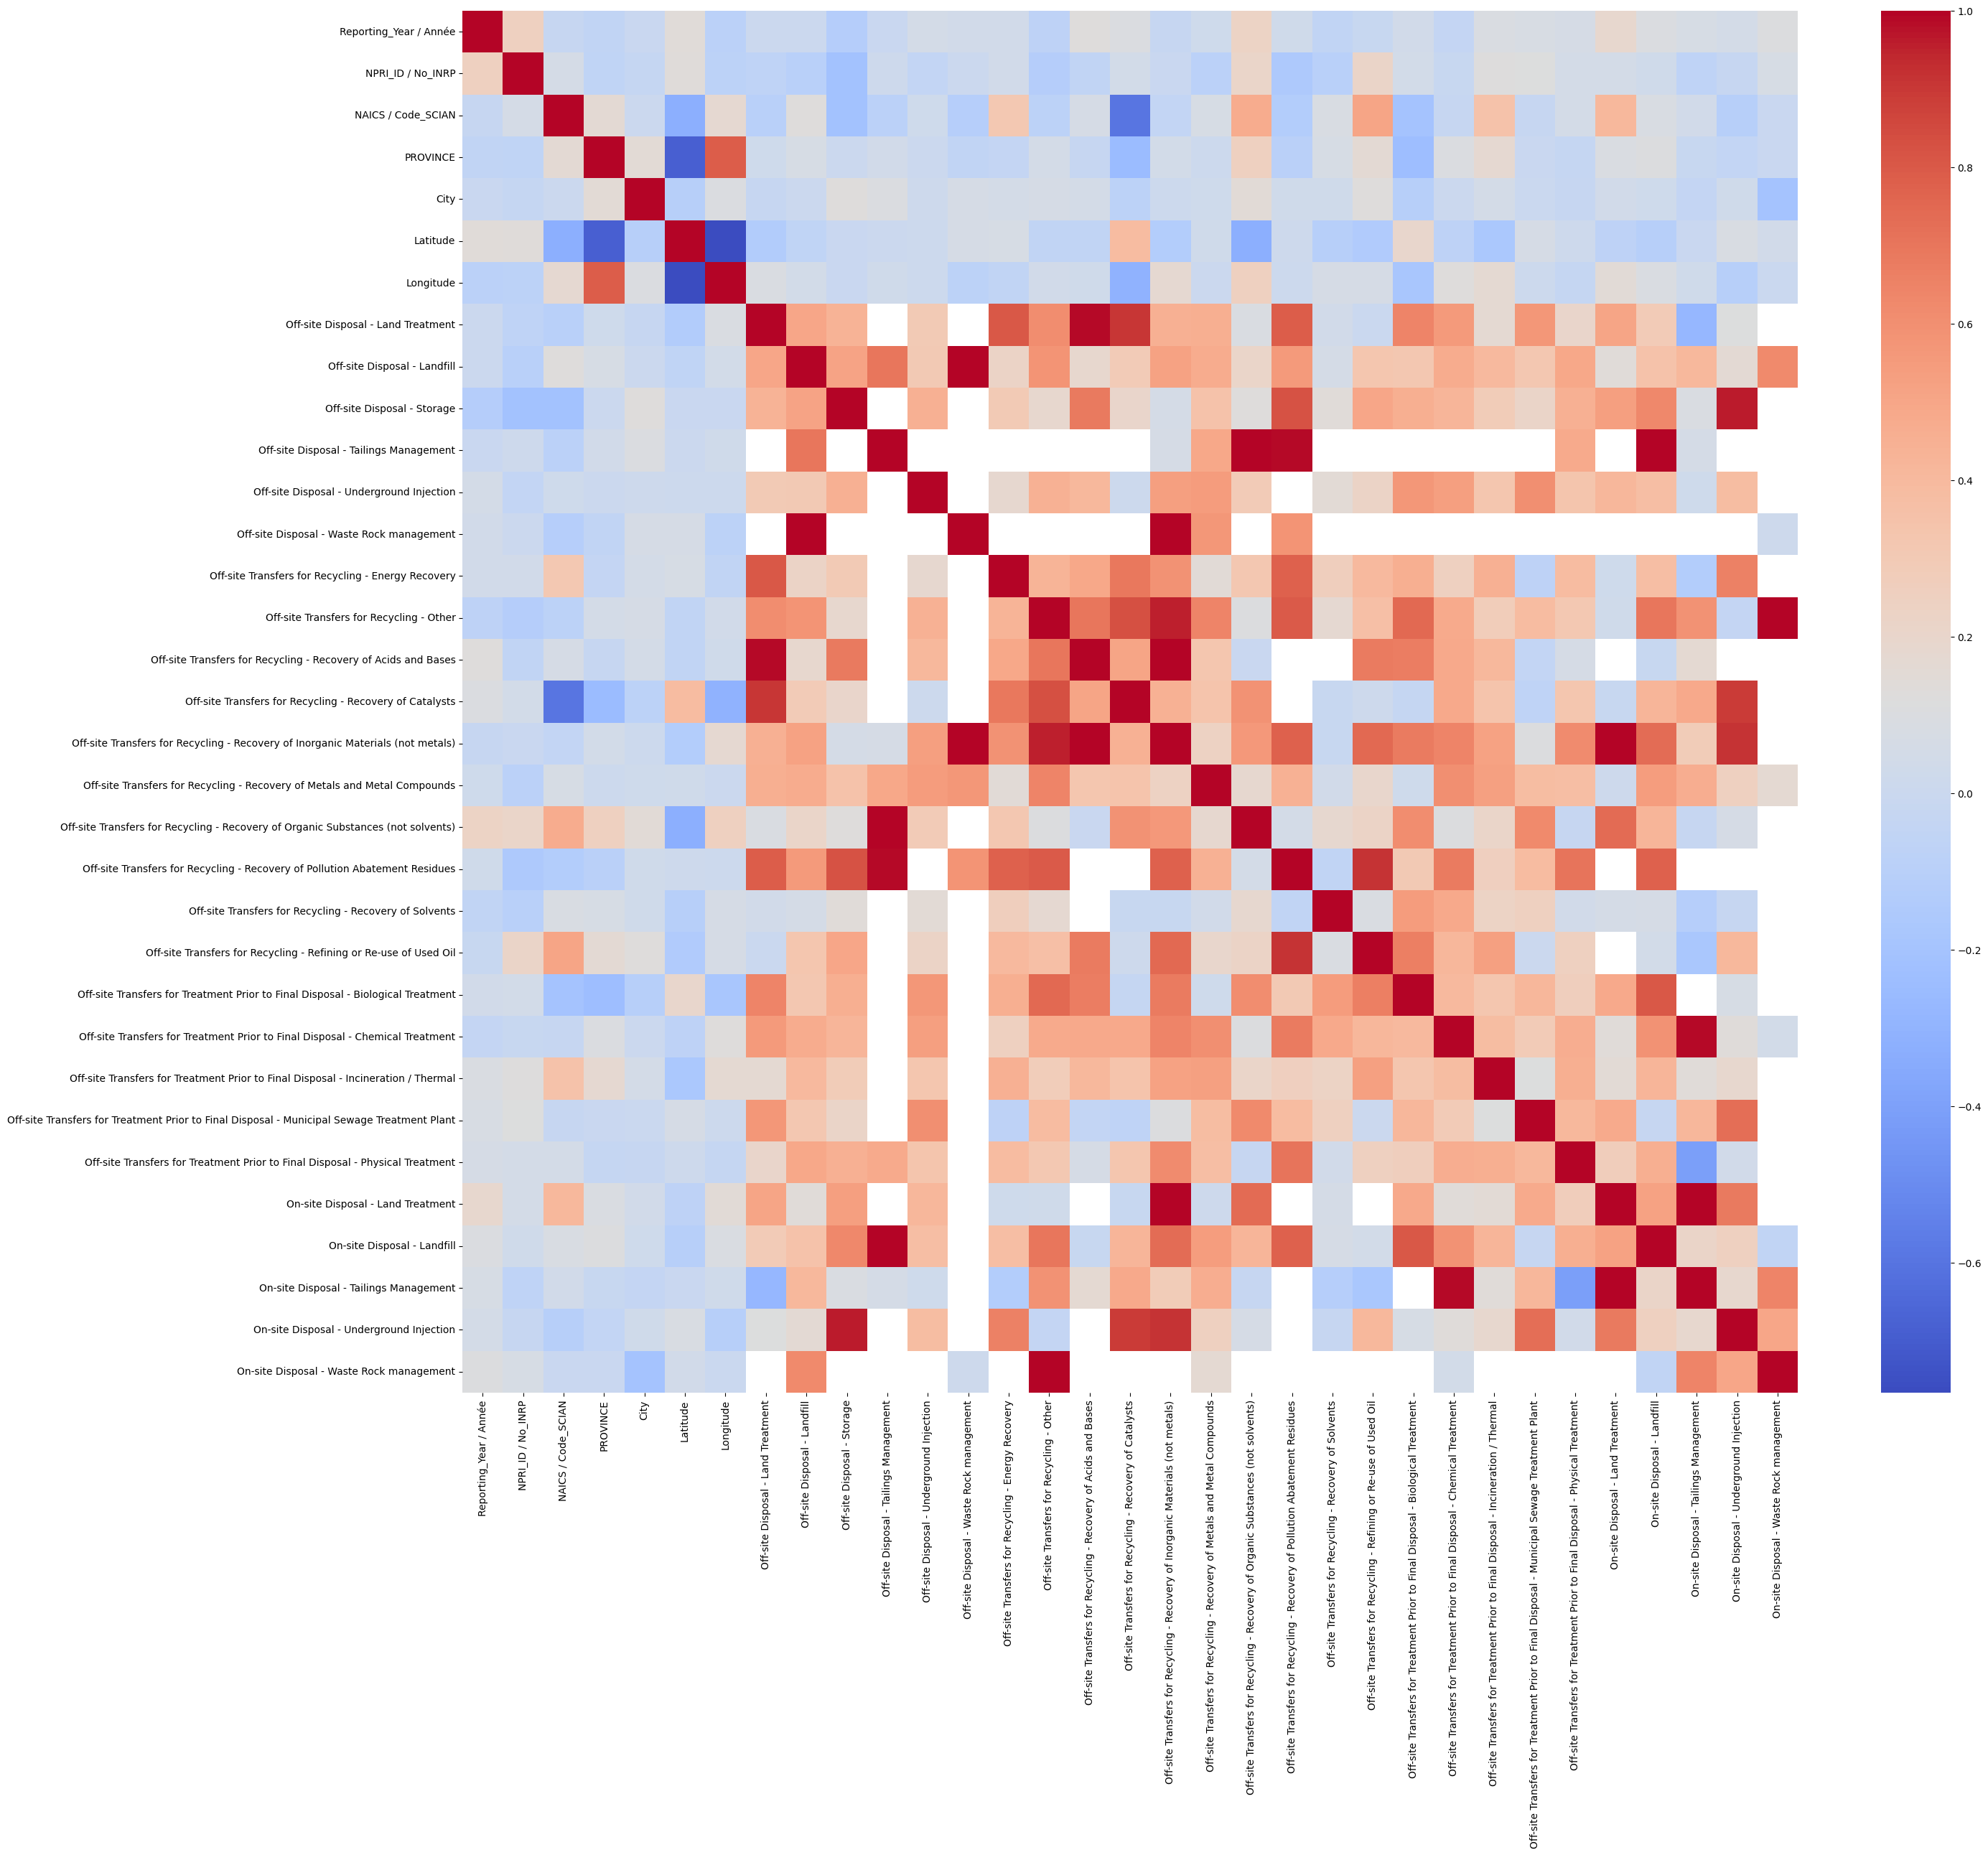

In [20]:
plt.figure(figsize=(30,25))
sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.show()



In [21]:
corr_matrix = numeric_df.corr().abs()

upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

high_corr_pairs = [
    (row, col, upper_tri.loc[row, col])
    for row in upper_tri.index
    for col in upper_tri.columns
    if upper_tri.loc[row, col] > 0.80
]

high_corr_pairs[:10]


[('Off-site Disposal - Land Treatment',
  'Off-site Transfers for Recycling - Energy Recovery',
  np.float64(0.8021030631597044)),
 ('Off-site Disposal - Land Treatment',
  'Off-site Transfers for Recycling - Recovery of Acids and Bases',
  np.float64(0.99178213649658)),
 ('Off-site Disposal - Land Treatment',
  'Off-site Transfers for Recycling - Recovery of Catalysts',
  np.float64(0.9043557190523889)),
 ('Off-site Disposal - Landfill',
  'Off-site Disposal - Waste Rock management',
  np.float64(1.0)),
 ('Off-site Disposal - Storage',
  'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues',
  np.float64(0.8229094063702633)),
 ('Off-site Disposal - Storage',
  'On-site Disposal - Underground Injection',
  np.float64(0.9587242888470089)),
 ('Off-site Disposal - Tailings Management',
  'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)',
  np.float64(0.9968614613562414)),
 ('Off-site Disposal - Tailings Management',
  'Off-site Tran

In [22]:
to_drop = [
    col for col in upper_tri.columns
    if any(upper_tri[col] > 0.80)
]

print("Dropping:", to_drop)

disposals_corr_reduced = disposals_encoded.drop(columns=to_drop)


Dropping: ['Off-site Disposal - Waste Rock management', 'Off-site Transfers for Recycling - Energy Recovery', 'Off-site Transfers for Recycling - Recovery of Acids and Bases', 'Off-site Transfers for Recycling - Recovery of Catalysts', 'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)', 'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)', 'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues', 'Off-site Transfers for Recycling - Refining or Re-use of Used Oil', 'On-site Disposal - Land Treatment', 'On-site Disposal - Landfill', 'On-site Disposal - Tailings Management', 'On-site Disposal - Underground Injection', 'On-site Disposal - Waste Rock management']


In [23]:
print("Before:", disposals_encoded.shape)
print("After:", disposals_corr_reduced.shape)


Before: (191645, 380)
After: (191645, 367)


In [24]:
cols = [c.lower() for c in disposals_corr_reduced.columns]

landfill_cols = [col for col in disposals_corr_reduced.columns
                 if "landfill" in col.lower() or "land fill" in col.lower()]

treatment_cols = [col for col in disposals_corr_reduced.columns
                  if "treat" in col.lower() or "treatment" in col.lower()]

recycle_cols = [col for col in disposals_corr_reduced.columns
                if "recycl" in col.lower() or "recovery" in col.lower()]


In [25]:
print(landfill_cols)
print(treatment_cols)
print(recycle_cols)


['Off-site Disposal - Landfill']
['Off-site Disposal - Land Treatment', 'Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment', 'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment', 'Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal', 'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant', 'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment', 'NAICS Title / Titre Code_SCIAN_Coating, Engraving, Heat Treating and Allied Activities', 'NAICS Title / Titre Code_SCIAN_Coating, engraving, cold and heat treating and allied activities', 'NAICS Title / Titre Code_SCIAN_Paper bag and coated and treated paper manufacturing', 'NAICS Title / Titre Code_SCIAN_Sewage treatment facilities', 'NAICS Title / Titre Code_SCIAN_Waste treatment and disposal']
['Off-site Transfers for Recycling - Other', 'Off-site Transfers for Recycling - Recovery of Metals an

In [26]:
# make sure missing values don’t mess sums
disposals_corr_reduced[landfill_cols] = disposals_corr_reduced[landfill_cols].fillna(0)
disposals_corr_reduced[treatment_cols] = disposals_corr_reduced[treatment_cols].fillna(0)
disposals_corr_reduced[recycle_cols] = disposals_corr_reduced[recycle_cols].fillna(0)

# totals
disposals_corr_reduced["landfill_total"]  = disposals_corr_reduced[landfill_cols].sum(axis=1)
disposals_corr_reduced["treatment_total"] = disposals_corr_reduced[treatment_cols].sum(axis=1)
disposals_corr_reduced["recycling_total"] = disposals_corr_reduced[recycle_cols].sum(axis=1)




In [27]:
# Detect year column
year_col = [c for c in disposals_corr_reduced.columns if "year" in c.lower()][0]
print("Year column:", year_col)

# Aggregate totals per year
yearly = disposals_corr_reduced.groupby(year_col)[
    ["landfill_total", "treatment_total", "recycling_total"]
].sum()

yearly


Year column: Reporting_Year / Année


,landfill_total,treatment_total,recycling_total
Reporting_Year / Année,,,
2000.0,12945.014500,11088.534675,56331.931
2001.0,14208.281000,11577.49535,60126.43725
2002.0,26506.948500,20357.733575,103225.30825
2003.0,32288.771000,23807.2913,108569.596
2004.0,33001.858400,24420.5213,113456.40725
2005.0,30310.603500,24510.1383,115314.73375
2006.0,28699.981000,24213.8019,111184.0105
2007.0,28180.043000,24701.953375,107137.098481
2008.0,27923.062000,26052.320525,100590.749


In [28]:
yearly["total_waste"] = yearly.sum(axis=1)

yearly["landfill_prop"]  = yearly["landfill_total"] / yearly["total_waste"]
yearly["treatment_prop"] = yearly["treatment_total"] / yearly["total_waste"]
yearly["recycling_prop"] = yearly["recycling_total"] / yearly["total_waste"]

yearly


,landfill_total,treatment_total,recycling_total,total_waste,landfill_prop,treatment_prop,recycling_prop
Reporting_Year / Année,,,,,,,
2000.0,12945.014500,11088.534675,56331.931,80365.480175,0.161077,0.137976,0.700947
2001.0,14208.281000,11577.49535,60126.43725,85912.2136,0.165381,0.13476,0.699859
2002.0,26506.948500,20357.733575,103225.30825,150089.990325,0.176607,0.135637,0.687756
2003.0,32288.771000,23807.2913,108569.596,164665.6583,0.196087,0.14458,0.659334
2004.0,33001.858400,24420.5213,113456.40725,170878.78695,0.19313,0.142911,0.663958
2005.0,30310.603500,24510.1383,115314.73375,170135.47555,0.178156,0.144062,0.677782
2006.0,28699.981000,24213.8019,111184.0105,164097.7934,0.174896,0.147557,0.677547
2007.0,28180.043000,24701.953375,107137.098481,160019.094856,0.176104,0.154369,0.669527
2008.0,27923.062000,26052.320525,100590.749,154566.131525,0.180654,0.168551,0.650794


In [29]:
last_5 = yearly.tail(5)

forecast = {
    "landfill_prop_next5yr": last_5["landfill_prop"].mean(),
    "treatment_prop_next5yr": last_5["treatment_prop"].mean(),
    "recycling_prop_next5yr": last_5["recycling_prop"].mean()
}

forecast


{'landfill_prop_next5yr': np.float64(0.1945312808331441),
 'treatment_prop_next5yr': np.float64(0.22947924099098768),
 'recycling_prop_next5yr': np.float64(0.5759894781758681)}

“For the forecasting part, I did not use any machine learning.
Instead, I used a simple trend-based approach. First, I grouped all disposal data by year and calculated the yearly proportion of waste going to landfill, treatment, and recycling. Then I looked at the change in these proportions over the last 5 years to understand the recent trend. Using that trend, I extended the line forward to predict the next 5 years. Finally, I plotted a line chart that shows both the historical values and the projected future values in an easy-to-understand way.”

In [30]:
from sklearn.preprocessing import MinMaxScaler

# 1. Select numeric columns for normalization
num_cols = disposals_encoded.select_dtypes(include=['int64', 'float64']).columns

# 2. Initialize scaler
minmax_scaler = MinMaxScaler()

# 3. Fit + transform
normalized_df = disposals_encoded.copy()
normalized_df[num_cols] = minmax_scaler.fit_transform(disposals_encoded[num_cols])

print("Normalization completed! Dataset is now scaled between 0 and 1.")
normalized_df.head()


Normalization completed! Dataset is now scaled between 0 and 1.


,Reporting_Year / Année,NPRI_ID / No_INRP,Number of employees,Company_Name / Dénomination_sociale_de_l'entreprise,Facility_Name / Installation,NAICS / Code_SCIAN,PROVINCE,City,Latitude,Longitude,...,NAICS Title / Titre Code_SCIAN_Waferboard mills,NAICS Title / Titre Code_SCIAN_Waste collection,NAICS Title / Titre Code_SCIAN_Waste treatment and disposal,NAICS Title / Titre Code_SCIAN_Water supply and irrigation systems,NAICS Title / Titre Code_SCIAN_Wet corn milling,NAICS Title / Titre Code_SCIAN_Wiring device manufacturing,NAICS Title / Titre Code_SCIAN_Wood Window and Door Manufacturing,NAICS Title / Titre Code_SCIAN_Wood kitchen cabinet and counter top manufacturing,"NAICS Title / Titre Code_SCIAN_Wood office furniture, including custom architectural woodwork, manufacturing",NAICS Title / Titre Code_SCIAN_Wood preservation
0,0.0,0.00000,440,Alberta-Pacific Forest Industries Inc.,(blank),0.536978,0.000000,0.199052,0.753464,0.222071,...,False,False,False,False,False,False,False,False,False,False
1,0.0,0.00000,440,Alberta-Pacific Forest Industries Inc.,(blank),0.536978,0.000000,0.199052,0.753464,0.222071,...,False,False,False,False,False,False,False,False,False,False
2,0.0,0.00022,500,Pine Falls Paper Company,Pine Falls,0.537003,0.166667,0.607312,0.606254,0.373682,...,False,False,False,False,False,False,False,False,False,False
3,0.0,0.00022,500,Pine Falls Paper Company,Pine Falls,0.537003,0.166667,0.607312,0.606254,0.373682,...,False,False,False,False,False,False,False,False,False,False
4,0.0,0.00022,500,Pine Falls Paper Company,Pine Falls,0.537003,0.166667,0.607312,0.606254,0.373682,...,False,False,False,False,False,False,False,False,False,False


In [31]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns only
numeric_cols = disposals_encoded.select_dtypes(include=['int64', 'float64']).columns

# Create a scaler
scaler = StandardScaler()

# Fit + transform numeric features
disposals_encoded[numeric_cols] = scaler.fit_transform(disposals_encoded[numeric_cols])

print("Standardization complete. Dataset is now ready for modelling.")


Standardization complete. Dataset is now ready for modelling.


/tmp/ipython-input-1020545.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  disposals_corr_reduced[treatment_cols] = disposals_corr_reduced[treatment_cols].fillna(0)
/tmp/ipython-input-1020545.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  disposals_corr_reduced[recycle_cols]   = disposals_corr_reduced[recycle_cols].fillna(0)


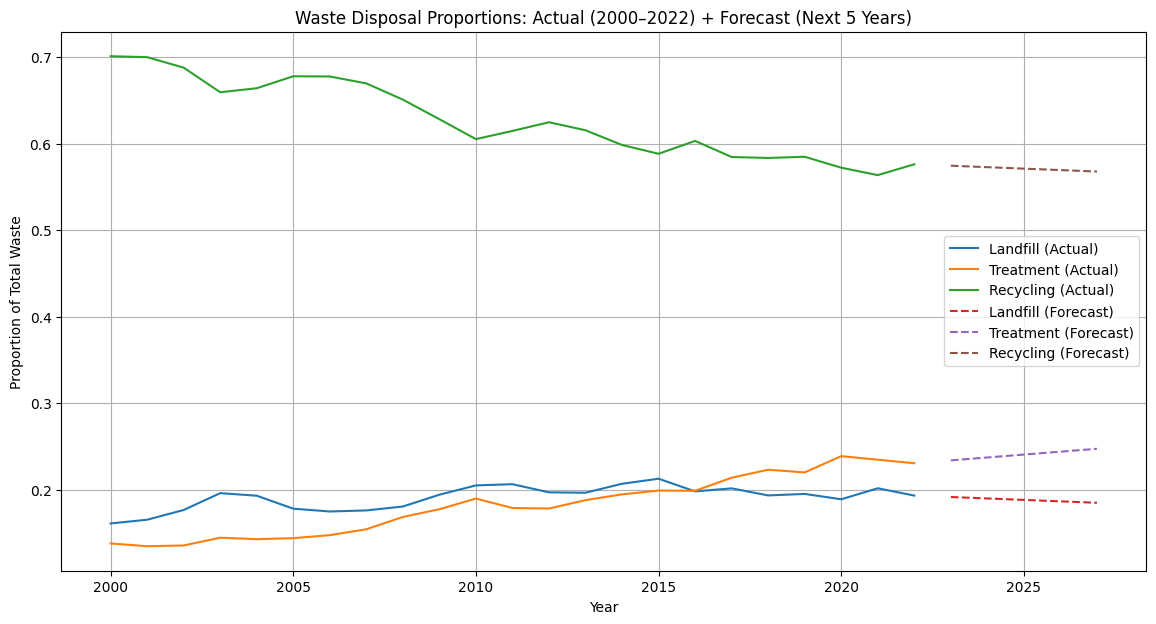

In [32]:


# --- 2) Detect year column ---
year_col = [c for c in disposals_corr_reduced.columns if "year" in c.lower()][0]
disposals_corr_reduced[year_col] = disposals_corr_reduced[year_col].astype(int)

# --- 3) Rebuild groups (same logic you used) ---
landfill_cols = [c for c in disposals_corr_reduced.columns if "landfill" in c.lower()]

treatment_cols = [c for c in disposals_corr_reduced.columns
                  if ("treat" in c.lower()) or ("treatment" in c.lower())]

recycle_cols = [c for c in disposals_corr_reduced.columns
                if ("recycl" in c.lower()) or ("recovery" in c.lower())]

# fill NA with 0 for safe sums
disposals_corr_reduced[landfill_cols]  = disposals_corr_reduced[landfill_cols].fillna(0)
disposals_corr_reduced[treatment_cols] = disposals_corr_reduced[treatment_cols].fillna(0)
disposals_corr_reduced[recycle_cols]   = disposals_corr_reduced[recycle_cols].fillna(0)

# totals per row
disposals_corr_reduced["landfill_total"]  = disposals_corr_reduced[landfill_cols].sum(axis=1)
disposals_corr_reduced["treatment_total"] = disposals_corr_reduced[treatment_cols].sum(axis=1)
disposals_corr_reduced["recycling_total"] = disposals_corr_reduced[recycle_cols].sum(axis=1)

# --- 4) Yearly totals ---
yearly = disposals_corr_reduced.groupby(year_col)[
    ["landfill_total","treatment_total","recycling_total"]
].sum()

# --- 5) Yearly proportions ---
yearly["total_waste"] = yearly.sum(axis=1)
yearly["landfill_prop"]  = yearly["landfill_total"]  / yearly["total_waste"]
yearly["treatment_prop"] = yearly["treatment_total"] / yearly["total_waste"]
yearly["recycling_prop"] = yearly["recycling_total"] / yearly["total_waste"]

# --- 6) Non-ML Forecast using last-5-years linear trend ---
df = yearly.copy()
df.index = df.index.astype(int)

last_year = df.index.max()
future_years = np.arange(last_year + 1, last_year + 6)

def forecast_linear(series):
    # slope from last 5 years (between t-5 and t)
    slope = (series.iloc[-1] - series.iloc[-6]) / 5
    return series.iloc[-1] + slope * np.arange(1, 6)

fc_landfill  = forecast_linear(df["landfill_prop"])
fc_treatment = forecast_linear(df["treatment_prop"])
fc_recycle   = forecast_linear(df["recycling_prop"])

# --- 7) Plot actual + forecast (solid = actual, dashed = forecast) ---
plt.figure(figsize=(14,7))

plt.plot(df.index, df["landfill_prop"],  label="Landfill (Actual)")
plt.plot(df.index, df["treatment_prop"], label="Treatment (Actual)")
plt.plot(df.index, df["recycling_prop"], label="Recycling (Actual)")

plt.plot(future_years, fc_landfill,  "--", label="Landfill (Forecast)")
plt.plot(future_years, fc_treatment, "--", label="Treatment (Forecast)")
plt.plot(future_years, fc_recycle,   "--", label="Recycling (Forecast)")

plt.title("Waste Disposal Proportions: Actual (2000–2022) + Forecast (Next 5 Years)")
plt.xlabel("Year")
plt.ylabel("Proportion of Total Waste")
plt.grid(True)
plt.legend()
plt.show()


